In [2]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
#Have already plotted graphs in another file,this file only for preprocessing and training the models


In [4]:
df = pd.read_csv("traintest/train.csv")

In [5]:
data = df.copy()

In [6]:
test_csv = pd.read_csv("traintest/test.csv")

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd


        
        

In [8]:
class CustomProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OrdinalEncoder()
        self.scaler = MinMaxScaler()
        self.imputer = SimpleImputer(strategy="median")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()  # to avoid SettingwithCopywarning
        
        X.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
        
        X["Embarked"] = self.encoder.fit_transform(X[["Embarked"]])
        X["Sex"] = (X["Sex"] == "male").astype(int)
        
        X["Fare"] = self.scaler.fit_transform(X[["Fare"]])
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)
        
        return X



In [9]:
cols = list(df.columns)
cols.pop(1)
print(cols)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
dfn = df[cols]
dfn.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
process = CustomProcessor()

In [12]:
processed_data = process.fit_transform(dfn)

In [13]:
processed_data.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,1.0,22.0,1.0,0.0,0.014151,2.0
1,2.0,1.0,0.0,38.0,1.0,0.0,0.139136,0.0
2,3.0,3.0,0.0,26.0,0.0,0.0,0.015469,2.0
3,4.0,1.0,0.0,35.0,1.0,0.0,0.103644,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,0.015713,2.0
5,6.0,3.0,1.0,28.0,0.0,0.0,0.016510,1.0
6,7.0,1.0,1.0,54.0,0.0,0.0,0.101229,2.0
7,8.0,3.0,1.0,2.0,3.0,1.0,0.041136,2.0
8,9.0,3.0,0.0,27.0,0.0,2.0,0.021731,2.0
9,10.0,2.0,0.0,14.0,1.0,0.0,0.058694,0.0


In [14]:
processed_test_data=process.fit_transform(test_csv)

In [15]:
X_test = processed_test_data.copy()
X_test.copy()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892.0,3.0,1.0,34.5,0.0,0.0,0.015282,1.0
1,893.0,3.0,0.0,47.0,1.0,0.0,0.013663,2.0
2,894.0,2.0,1.0,62.0,0.0,0.0,0.018909,1.0
3,895.0,3.0,1.0,27.0,0.0,0.0,0.016908,2.0
4,896.0,3.0,0.0,22.0,1.0,1.0,0.023984,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,27.0,0.0,0.0,0.015713,2.0
414,1306.0,1.0,0.0,39.0,0.0,0.0,0.212559,0.0
415,1307.0,3.0,1.0,38.5,0.0,0.0,0.014151,2.0
416,1308.0,3.0,1.0,27.0,0.0,0.0,0.015713,2.0


In [133]:
X = processed_data.copy()
y = data["Survived"]

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [134]:
#neural nets( a very bad implementation
import tensorflow as tf

In [135]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [137]:
import tensorflow as tf

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss="binary_crossentropy")


In [138]:
data = nn.fit(X,y,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3865 - val_loss: 0.7716
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7226 - val_loss: 0.7444
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7248 - val_loss: 0.8258
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6672 - val_loss: 0.9103
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6718 - val_loss: 0.6521
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7312 - val_loss: 0.6019
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6452 - val_loss: 0.8695
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6374 - val_loss: 1.1694
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7404 - val_loss: 0.5941
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6622 - val_loss: 0.5989
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6337 - val_loss: 0.8537
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

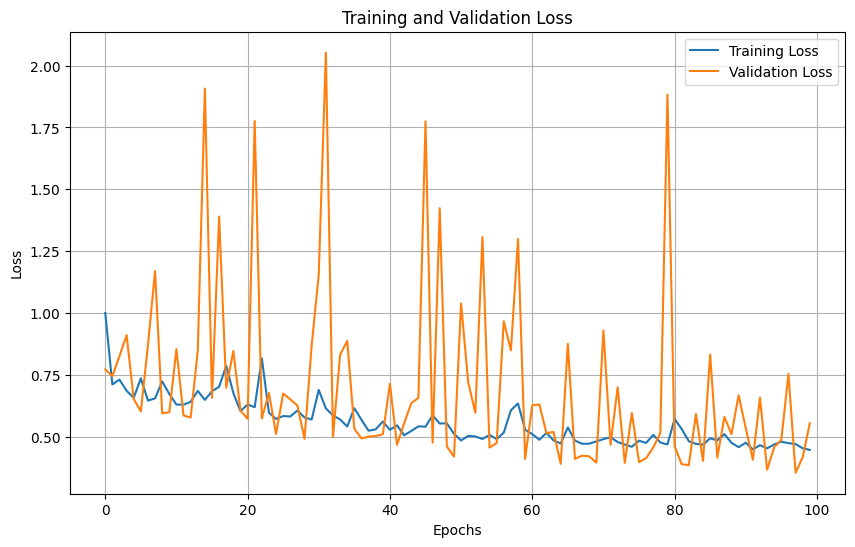

In [139]:
plot_loss(data)

In [140]:
y=nn.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [141]:
y=(y>0.5).astype(int)
y=y.flatten()
print(y)

[0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [142]:
result = pd.DataFrame({"PassengerId":X_test["PassengerId"],"Survived":y})
result.head(20)

,PassengerId,Survived
0,892.0,0
1,893.0,1
2,894.0,1
3,895.0,0
4,896.0,1
5,897.0,1
6,898.0,1
7,899.0,1
8,900.0,1
9,901.0,0


In [143]:
final_result = result.copy()

In [144]:
final_result.to_csv(r'C:\Main\Development\Python\titanic_final_nn.csv')